# Classification of Dogs and Cats Images - CNN Deep Learning!

In [1]:
# Assigning GPU memory usage to 50%  
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## doing Data Augmentation

In [42]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [43]:
test_datagen = ImageDataGenerator(rescale = 1./255)

#### *Reading Data*

Binary Classification

In [37]:
training_data = train_datagen.flow_from_directory('cats n dogs/Cats and Dogs train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 6200 images belonging to 2 classes.


In [38]:
test_data = test_datagen.flow_from_directory('cats n dogs/Cats and Dogs test',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 3600 images belonging to 2 classes.


## Creating Convolutional Neural Network

In [39]:
from tensorflow.keras.layers import Conv2D

In [40]:
from tensorflow.keras.layers import Dense

In [41]:
from tensorflow.keras.regularizers import l2

## Creating Model

In [44]:
cnn = tf.keras.models.Sequential()

#### *Adding The CNN Layer*

In [45]:
cnn = tf.keras.models.Sequential()

Using Relu Activation Function !

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

#### *Adding Max-Pooling*

In [47]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### *Adding the Second Layer*

In [48]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))

In [49]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

##### Flattening..

In [50]:
cnn.add(tf.keras.layers.Flatten())

##### Adding dense layer

In [51]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### *Using Support Vector Machine (SVM) for last layer*

*Since , For Binary Classification, I will be using a LINEAR SVM*

In [52]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='linear'))

## Initializing the Model

In [53]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

## Training the CNN Model

In [55]:
# Compiling using ADAM OPTIMIZER 
## Loss is declared hinge for the outer svm layer

cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

*Now, Training the created Model , Doing Model fitting on the Training Data* <br>
*And testing it on the Test data*

In [56]:
r=cnn.fit(x = training_data, validation_data = test_data, epochs = 20)

Epoch 1/20
194/194 [==============================] - 59s 305ms/step - loss: 0.9329 - accuracy: 0.5460 - val_loss: 0.9038 - val_accuracy: 0.6386
Epoch 2/20
194/194 [==============================] - 35s 178ms/step - loss: 0.7816 - accuracy: 0.6329 - val_loss: 0.7591 - val_accuracy: 0.6928
Epoch 3/20
194/194 [==============================] - 30s 157ms/step - loss: 0.7218 - accuracy: 0.6621 - val_loss: 0.7064 - val_accuracy: 0.7225
Epoch 4/20
194/194 [==============================] - 31s 157ms/step - loss: 0.6570 - accuracy: 0.6942 - val_loss: 0.6029 - val_accuracy: 0.7206
Epoch 5/20
194/194 [==============================] - 31s 158ms/step - loss: 0.6273 - accuracy: 0.7048 - val_loss: 0.6809 - val_accuracy: 0.7481
Epoch 6/20
194/194 [==============================] - 31s 158ms/step - loss: 0.6015 - accuracy: 0.7269 - val_loss: 0.6262 - val_accuracy: 0.7636
Epoch 7/20
194/194 [==============================] - 32s 163ms/step - loss: 0.5623 - accuracy: 0.7402 - val_loss: 0.5752 - val_ac

### _Plotting ACCURACY_

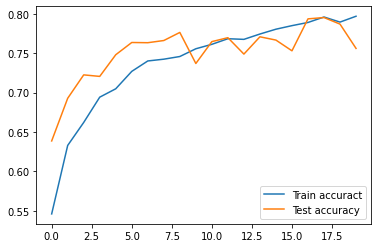

In [57]:
plt.plot(r.history['accuracy'], label='Train accuract')
plt.plot(r.history['val_accuracy'], label='Test accuracy')
plt.legend()
plt.show()

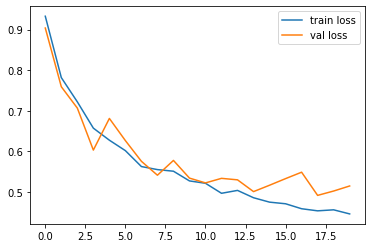

In [58]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

### Saving The File

In [59]:
from tensorflow.keras.models import load_model
cnn.save('model_dogcatcnn.h5')

##### Loading the Model

In [60]:
model = load_model('model_dogcatcnn.h5')

## Reading an image for Prediction


Taking an image from the test folder and testing it if the model is doing the right prediction!

If the value of Array is NEGATIVE -> It's a CAT

If the value of Array is POSITIVE -> It's a DOG

---

In [61]:
from tensorflow.keras.preprocessing import image

In [64]:
img = image.load_img('cats n dogs/Cats and Dogs test/Cat test/cat.10983.jpg',target_size=(244,244))

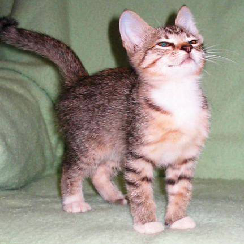

In [65]:
img

In [67]:
img = image.load_img('cats n dogs/Cats and Dogs test/Cat test/cat.10983.jpg',target_size=(64,64))
img = image.img_to_array(img)
img=img/255
img = np.expand_dims(img, axis = 0)
result = cnn.predict(img)

In [68]:
result

array([[-0.96248984]], dtype=float32)

Since,  the value of Array is NEGATIVE -> It's a CAT

Which means the prediction is right !

---

### Now, Predicting for another image

In [73]:
img2 = image.load_img('cats n dogs/Cats and Dogs test/Dog test/dog.9807.jpg',target_size=(244,244))

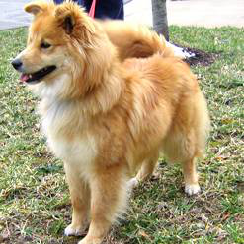

In [74]:
img2

In [77]:
img2 = image.load_img('cats n dogs/Cats and Dogs test/Dog test/dog.9807.jpg',target_size=(64,64))
img2 = image.img_to_array(img2)
img2=img2/255
img2 = np.expand_dims(img2, axis = 0)
result2 = cnn.predict(img2)

In [78]:
result2

array([[4.6483774]], dtype=float32)

Since,  the value of Array is POSITIVE -> It's a DOG

Which means the prediction is right !